In [232]:
import matplotlib;
import matplotlib.pyplot as plt
import numpy as np

#### 1. Create an array with 100 elements from 1 to 100 in order: Create a box plot to visualize your data.

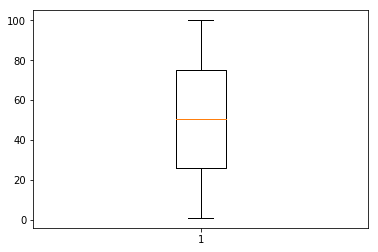

In [233]:
# fake up some data

nums = np.arange(1,101)
plt.boxplot(nums)

plt.show()


#### 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.

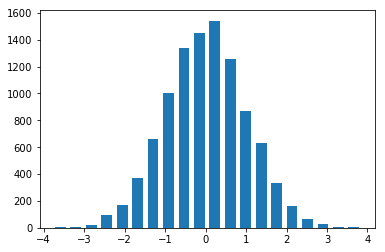

In [234]:
x =  np.random.randn(10000)
hist, bins = np.histogram(x, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
# plt.bar([20], 2, hist)
plt.show()

#### 3. Write a program to generate 100 random number uniformly distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.

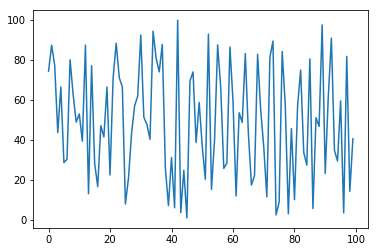

In [235]:
array = np.random.uniform(low=1,high=100,size=100)
array.tofile('uniformDistNums.bin')

plt.plot(array)
plt.show()

#### 4 Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: display a histogram of your result.

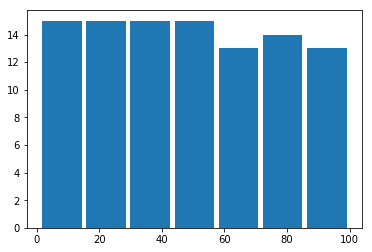

In [236]:
readarray = np.fromfile('uniformDistNums.bin')

x = readarray
hist, bins = np.histogram(x, bins=7)
width = 0.9*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
# plt.bar([20], 2, hist)
plt.show()